# **Analysis of Research Report Datasets**

## *Initial Findings*
Two different studies were made in the report, germination index prediction and Carbon/Nitrogen ratio prediction
  
> #### <u>GI Prediction</U>
> It's the prediction of how fast a seed develops. we won't go in much detail here since it's out of our project scope
> #### <u>C/N Ratio Prediction</u>
> It's the prediction of C/N ratio when the compost matures, "The C/N ratio will decrease below 15, which is caused by that carbon is undertaken as energy source of microbes while nitrgen is taken as the source to build cell structure (Sharma, et al., 2018)"

## **LIDA Composting Project Goal**
The goal of our project is to ***AUTOMATE*** and ***OPTIMIZE*** LIDA Composter to be the most efficient composting can be. This analysis is to understand what sort of features we're expected to work with, and how each features correlate with one another.
> ### *Key Takeaways*
> We're only analyzing in <u>**C/N ratio prediction dataset**</u>, since it's eliminates the seed germination factor. 

In [1]:
# UNCOMMENT THIS LINE IF YOU HAVEN'T INSTALL THE LIBRARIES

# !pip install pandas
# !pip install seaborn
# !pip install matplotlib
# !pip install scikit-learn

In [2]:
import os
import pandas as pd

In [3]:
os.listdir('data')

['1-s2.0-S0960852422014407-mmc3 - 1-s2.0-S0960852422014407-mmc3.csv',
 '.ipynb_checkpoints',
 '1-s2.0-S0960852422014407-mmc2 - 1-s2.0-S0960852422014407-mmc2.csv']

In [4]:
file_paths = ['data/1-s2.0-S0960852422014407-mmc3 - 1-s2.0-S0960852422014407-mmc3.csv',
              'data/1-s2.0-S0960852422014407-mmc2 - 1-s2.0-S0960852422014407-mmc2.csv']

In [5]:
df1 = pd.read_csv(file_paths[0])
df2 = pd.read_csv(file_paths[1])

In [6]:
# set first row as header and dropping 1st row

df1.columns = df1.iloc[0]
df1 = df1[1:]

df2.columns = df2.iloc[0]
df2 = df2[1:]

In [7]:
df1.tail(10)

,Reference,Mixture_main,Mixture_secondary,pH_m,EC_m\n(ms/cm),MC_m\n(%),C/N_m,Additive,Duration_time\n(day),T_ambient\n(℃),T_p\n(℃),pH_p,EC_p\n(ms/cm),Aeration\n( L/kg(dry mass)·min),C/N_p
233,S11,Food Waste,sawdust,5.6,2.5,57.5,26,0,42.0011,20,23.146,8.89805,4.57533,0,18.8066
234,S11,Food Waste,sawdust,5.6,2.5,57.5,26,0,55.979,20,21.1651,8.73359,4.54471,0,19.1573
235,S11,Food Waste,sawdust,11,4.3,57.5,26,1,0.0337901,20,32.985,11.0143,4.3198,0,24.5126
236,S11,Food Waste,sawdust,11,4.3,57.5,26,1,2.96227,20,29.6289,7.99987,4.74408,0,23.8071
237,S11,Food Waste,sawdust,11,4.3,57.5,26,1,7.00582,20,63.2387,6.32739,5.28029,0,24.7849
238,S11,Food Waste,sawdust,11,4.3,57.5,26,1,13.9778,20,59.5553,8.66779,4.38286,0,22.59
239,S11,Food Waste,sawdust,11,4.3,57.5,26,1,21.04,20,51.0914,8.40221,4.48465,0,19.2068
240,S11,Food Waste,sawdust,11,4.3,57.5,26,1,28.0008,20,26.1255,8.34209,3.86434,0,18.8437
241,S11,Food Waste,sawdust,11,4.3,57.5,26,1,41.9899,20,22.4911,8.85904,4.09264,0,16.0629
242,S11,Food Waste,sawdust,11,4.3,57.5,26,1,55.9452,20,23.5225,8.91825,4.04771,0,16.0423


In [8]:
df1.columns.tolist()

['Reference',
 'Mixture_main',
 'Mixture_secondary',
 'pH_m',
 'EC_m\n(ms/cm)',
 'MC_m\n(%)',
 'C/N_m',
 'Additive',
 'Duration_time\n(day)',
 'T_ambient\n(℃)',
 'T_p\n(℃)',
 'pH_p',
 'EC_p\n(ms/cm)',
 'Aeration\n( L/kg(dry mass)·min)',
 'C/N_p']

## **The meaning of each feature headers**

In [9]:
df1 = df1.drop('Reference', axis=1)

**"?=" means unsure**

1. 'Reference',
2. 'Mixture_main',
3. 'Mixture_secondary',
4. 'pH_m' = **pH of mixture**'EC_m\n(ms/cm)' = **Electrical conductivity of mixture**
- 'MC_m\n(%)' = **Moisture content of mixture**
- 'C/N_m' = **Initial C/N ratio of mixture**
- 'Additive' = (No specficiation on what type of additive is added, it's just binary)
- 'Duration_time\n(day)' = **Composting Duration**
- 'T_ambient\n(℃)' = **Ambient Temp**
- 'T_p\n(℃)' 
- 'pH_p' **?= pH of mixture after composting**
- 'EC_p\n(ms/cm)' **?= Electrical conductivity of mixture after composting**
- 'Aeration\n( L/kg(dry mass)·min)' = **Ventilation rate**
- 'C/N_p'

# **Label Encoding** (converting string values to int/float values)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 1 to 242
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Mixture_main                    242 non-null    object
 1   Mixture_secondary               242 non-null    object
 2   pH_m                            242 non-null    object
 3   EC_m
(ms/cm)                    242 non-null    object
 4   MC_m
(%)                        242 non-null    object
 5   C/N_m                           242 non-null    object
 6   Additive                        242 non-null    object
 7   Duration_time
(day)             242 non-null    object
 8   T_ambient
(℃)                   242 non-null    object
 9   T_p
(℃)                         242 non-null    object
 10  pH_p                            242 non-null    object
 11  EC_p
(ms/cm)                    242 non-null    object
 12  Aeration
( L/kg(dry mass)·min)  242 non-null    ob

In [11]:
# Encoding the necessary cols

cols_to_encode = ['Mixture_main', 'Mixture_secondary']

from sklearn.preprocessing import LabelEncoder

for col in cols_to_encode:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])

In [12]:
# converting all cols from object to float

df1 = df1.astype('float64')

# **Feature Correlation Analysis**
> It measures how close one feature is to another. Knowing the features' correlation, we can drop one feature without having to blindly sacrifice model's performance

In [13]:
import matplotlib.pyplot as plt

corr_matrix = df1.corr()
print("Correlation Matrix:")
corr_matrix

Correlation Matrix:


,Mixture_main,Mixture_secondary,pH_m,EC_m\n(ms/cm),MC_m\n(%),C/N_m,Additive,Duration_time\n(day),T_ambient\n(℃),T_p\n(℃),pH_p,EC_p\n(ms/cm),Aeration\n( L/kg(dry mass)·min),C/N_p
0,,,,,,,,,,,,,,
Mixture_main,1.000000,-0.462675,0.112978,-0.171041,0.406818,0.546806,-0.040076,0.070849,0.319883,-0.043753,0.076297,0.076430,-0.383530,0.136179
Mixture_secondary,-0.462675,1.000000,0.441329,0.420231,-0.252621,-0.050560,-0.035471,0.021687,-0.789276,-0.085831,0.180589,0.264170,-0.285868,0.229960
pH_m,0.112978,0.441329,1.000000,0.523490,-0.116443,0.189661,0.079954,0.103296,-0.260285,0.042197,0.511266,0.567937,-0.551817,0.234469
EC_m\n(ms/cm),-0.171041,0.420231,0.523490,1.000000,0.058714,-0.506217,-0.237158,-0.018231,-0.204641,0.248613,0.350207,0.671414,-0.362261,-0.254353
MC_m\n(%),0.406818,-0.252621,-0.116443,0.058714,1.000000,0.196900,0.080678,0.139060,0.380118,-0.108806,-0.023011,0.209941,-0.315299,-0.168957
C/N_m,0.546806,-0.050560,0.189661,-0.506217,0.196900,1.000000,0.138659,0.236401,-0.123105,-0.334347,0.051936,-0.232224,-0.322947,0.555069
Additive,-0.040076,-0.035471,0.079954,-0.237158,0.080678,0.138659,1.000000,0.017621,0.084610,-0.132264,-0.026748,-0.116972,-0.040508,0.130801
Duration_time\n(day),0.070849,0.021687,0.103296,-0.018231,0.139060,0.236401,0.017621,1.000000,-0.178573,-0.434006,0.469461,0.035654,-0.106134,-0.460495
T_ambient\n(℃),0.319883,-0.789276,-0.260285,-0.204641,0.380118,-0.123105,0.084610,-0.178573,1.000000,0.196081,-0.210484,0.052480,0.024369,-0.164692


<function matplotlib.pyplot.show(close=None, block=None)>

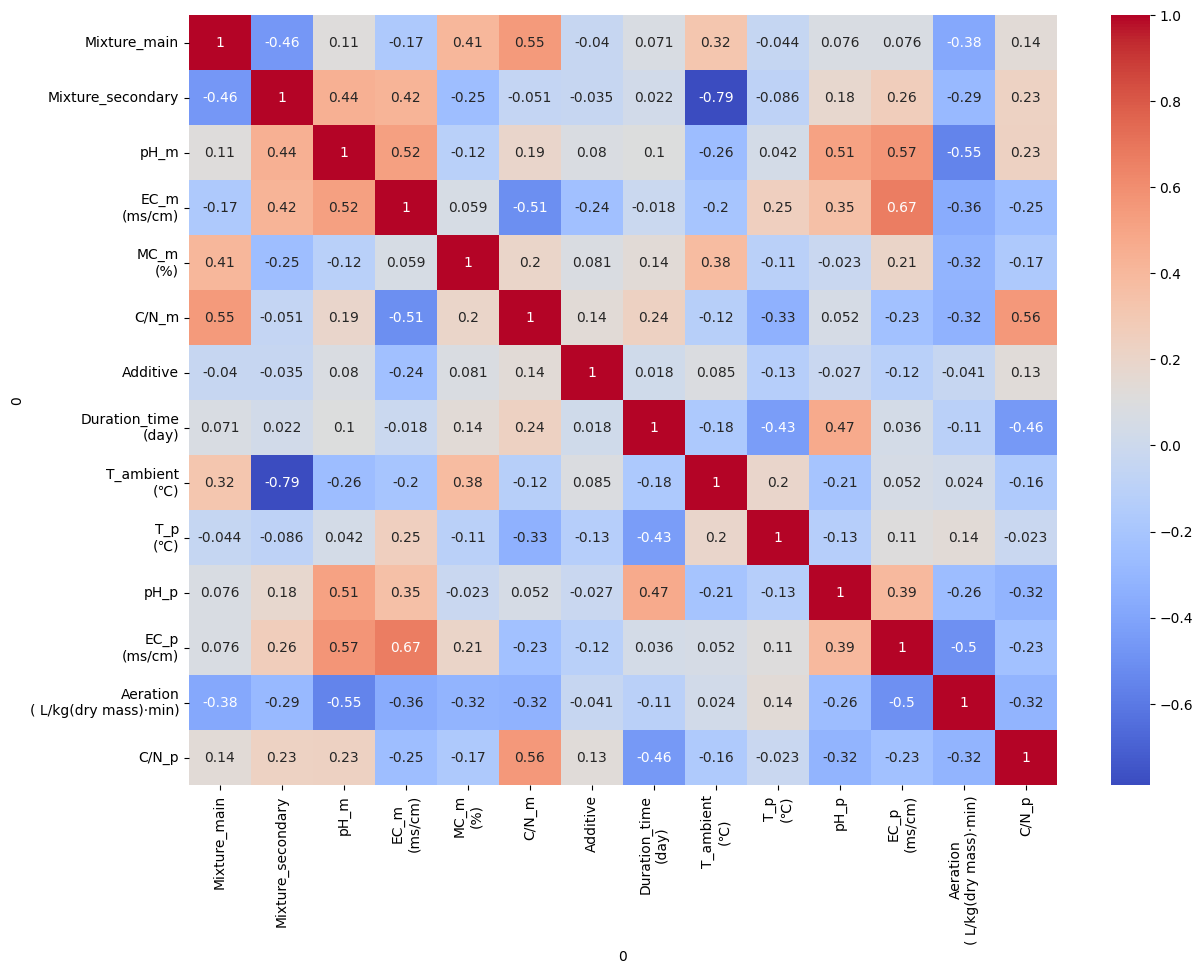

In [14]:
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show

# **Feature Importance Analysis using Mutual Info (MI)**
> By calculating the features' dependency with its target, MI outputs a score indicating which feature is most "important" for the target. The higher the MI score, the more dependent the target is to the feature.

### Note
- The code below measures the importance between all features and **C/N ratio prediction**. The question here is, how are we implementing these features to meet out project goal?
- Secondly, the key letter **"m"** and **"p"** can be important here. From my understanding, **"m"** is *BEFORE* composting begins. **"p"** is *AFTER* composting OR it can be their model's prediction

In [15]:
from sklearn.feature_selection import mutual_info_regression

X = df1.iloc[:, 0:13] # assigning all features to X
y = df1.iloc[:, -1] # assigning target var to y

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

print("MI_SCORES:")
mi_df

MI_SCORES:


,Feature,Mutual Information
11,EC_p\n(ms/cm),0.508097
5,C/N_m,0.480197
3,EC_m\n(ms/cm),0.467164
2,pH_m,0.438886
4,MC_m\n(%),0.412944
8,T_ambient\n(℃),0.411654
10,pH_p,0.404456
7,Duration_time\n(day),0.320368
9,T_p\n(℃),0.288653
12,Aeration\n( L/kg(dry mass)·min),0.271017


## **Feature Importance with "Composting Duration"**
> Maybe these features can be used for optimizing composting efficiency?

In [16]:
df1.head()

,Mixture_main,Mixture_secondary,pH_m,EC_m\n(ms/cm),MC_m\n(%),C/N_m,Additive,Duration_time\n(day),T_ambient\n(℃),T_p\n(℃),pH_p,EC_p\n(ms/cm),Aeration\n( L/kg(dry mass)·min),C/N_p
1,0.0,4.0,4.4,1.58,60.0,22.0,0.0,0.00000,15.1126,18.5538,4.40308,1.57538,0.4,21.4400
2,0.0,4.0,4.4,1.58,60.0,22.0,0.0,5.94059,15.8129,44.0308,4.36615,1.64923,0.4,16.2708
3,0.0,4.0,4.4,1.58,60.0,22.0,0.0,11.95540,14.3018,56.2154,6.32308,1.66154,0.4,14.3015
4,0.0,4.0,4.4,1.58,60.0,22.0,0.0,19.97520,13.5870,60.6462,7.70769,2.51077,0.4,11.7908
5,0.0,4.0,4.4,1.58,60.0,22.0,0.0,24.95050,13.3976,48.1846,8.15077,2.73231,0.4,10.4615


In [17]:
X = df1.iloc[:, 0:14]
y = X.pop('Duration_time\n(day)')

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

print("MI_SCORES:")
mi_df

MI_SCORES:


,Feature,Mutual Information
7,T_ambient\n(℃),1.289806
8,T_p\n(℃),0.909753
9,pH_p,0.516313
11,Aeration\n( L/kg(dry mass)·min),0.464515
1,Mixture_secondary,0.411420
0,Mixture_main,0.406096
12,C/N_p,0.322426
10,EC_p\n(ms/cm),0.290710
4,MC_m\n(%),0.102973
3,EC_m\n(ms/cm),0.035264
